# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

from ppn2v.unet.model import UNet

from ppn2v import utils, training
from ppn2v.noise_models import histNoiseModel
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://cloud.mpi-cbg.de/index.php/s/BE8raMtHQlgLDF3/download. Here we show the pipeline for Convallaria dataset. Save the dataset in an appropriate path. For us, the path is the data folder which exists at `../../../`. For Convallaria, the data to be denoised is named ```20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data'):
    os.mkdir('../../../data')

zipPath="../../../data/Convallaria_diaphragm.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve('https://cloud.mpi-cbg.de/index.php/s/BE8raMtHQlgLDF3/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data")


### Load Data
#### Check ```filename``` and specify the ```dataname```  

In [3]:
path='../../../data/Convallaria_diaphragm/'
fileName='20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif'
dataName='convallaria' # This will be used to name the noise2void model

Run the cells below

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Convallaria` dataset.

In [5]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch = 10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.2558548141270876+-(2SEM)0.11191699216763272      
Epoch 1 finished      
avg. loss: 0.1639251971617341+-(2SEM)0.04419341570741218      
Epoch 2 finished      
avg. loss: 0.1221312154084444+-(2SEM)0.02090451573617619      
Epoch 3 finished      
avg. loss: 0.13310510218143462+-(2SEM)0.0383514835856406      
Epoch 4 finished      
avg. loss: 0.10745265297591686+-(2SEM)0.03082282019577678      
Epoch 5 finished      
avg. loss: 0.13133044224232435+-(2SEM)0.033454885366212196      
Epoch 6 finished      
avg. loss: 0.12170723006129265+-(2SEM)0.025266231807670136      
Epoch 7 finished      
avg. loss: 0.1206331081688404+-(2SEM)0.023200562690510504      
Epoch 8 finished      
avg. loss: 0.11430105697363616+-(2SEM)0.03415866476725606      
Epoch 9 finished      
avg. loss: 0.11096248822286725+-(2SEM)0.03138591474832479      
Epoch 10 finished      
avg. loss: 0.12015287149697543+-(2SEM)0.028044051732168982      
Epoch 11 finished      
avg. loss: 0.113313

avg. loss: 0.09952291389927267+-(2SEM)0.023326284094367784      
Epoch 89 finished      
avg. loss: 0.10414491705596447+-(2SEM)0.022380398923365814      
Epoch 90 finished      
avg. loss: 0.12165736174210906+-(2SEM)0.03196291897448372      
Epoch 91 finished      
avg. loss: 0.11901323590427637+-(2SEM)0.03460390425345113      
Epoch 92 finished      
avg. loss: 0.12313114274293184+-(2SEM)0.03533490918632185      
Epoch 93 finished      
avg. loss: 0.11046055369079114+-(2SEM)0.021140435333790474      
Epoch 94 finished      
avg. loss: 0.12978262323886156+-(2SEM)0.02978455518428229      
Epoch 95 finished      
avg. loss: 0.11388148702681064+-(2SEM)0.02477953256121822      
Epoch 96 finished      
avg. loss: 0.10502853291109204+-(2SEM)0.027773798082436657      
Epoch 97 finished      
avg. loss: 0.11884270794689655+-(2SEM)0.037804223272064806      
Epoch 98 finished      
avg. loss: 0.12089702226221562+-(2SEM)0.02663440728309316      
Epoch    99: reducing learning rate of group 0 to 3

avg. loss: 0.16727386005222797+-(2SEM)0.037842666094428004      
Epoch 176 finished      
avg. loss: 0.12116673924028873+-(2SEM)0.02822696292406776      
Epoch 177 finished      
avg. loss: 0.0985435526818037+-(2SEM)0.025189861420045076      
Epoch 178 finished      
avg. loss: 0.13465079311281442+-(2SEM)0.03581232960997431      
Epoch 179 finished      
avg. loss: 0.1319454095326364+-(2SEM)0.03792981310357543      
Epoch 180 finished      
avg. loss: 0.11028319168835879+-(2SEM)0.0228619432028792      
Epoch   181: reducing learning rate of group 0 to 3.0518e-08.
Epoch 181 finished      
avg. loss: 0.13461227361112832+-(2SEM)0.02972354617500355      
Epoch 182 finished      
avg. loss: 0.09168721744790673+-(2SEM)0.01701831862391424      
Epoch 183 finished      
avg. loss: 0.10434115100651979+-(2SEM)0.029909343101913045      
Epoch 184 finished      
avg. loss: 0.10819398714229464+-(2SEM)0.03169832939825746      
Epoch 185 finished      
avg. loss: 0.0873559420928359+-(2SEM)0.023646376

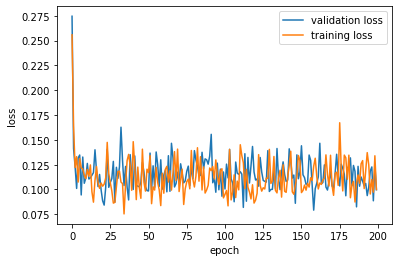

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()